Welcome to the **Loading Test Data with Behave lab**. When you are writing Behavior Driven Development features, the scenarios will be better understood with relevant data that can be used for testing. You can specify the initial state of data before the tests using `feature` files. To implement this, you need to write some code to populate the database.

In this lab, you are going to see how to keep the initial state data in the `Background:` section of a feature file, and use a REST API to post that data to the service that is under test.

# Learning Objectives

After completing this lab, you will be able to:
* Parse the data from a table in a feature file
* Post that data to a REST API to create the initial state

# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository:
```
git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git
```

## Change into the Repo Folder

Next switch to the directory that contains the lab files.
```
cd /home/project/duwjx-tdd_bdd_PracticeCode
```


## Install Lab Dependencies

Once you have cloned the repository, you need to install some prerequisite software into the development environment.
```
bash ./bin/setup.sh
```

## Change into the Lab Folder

Then you should switch to the directory that contains the lab files.
```
cd /home/project/duwjx-tdd_bdd_PracticeCode/labs/10_loading_test_data
```

## Install Python Dependencies

The final preparation step is to use `pip` to install the Python packages needed for the lab:
```
pip install -r requirements.txt
```
You are now ready to start the lab.

# Navigate to the Code

In the IDE, navigate to the `duwjx-tdd_bdd_PracticeCode/labs/10_loading_test_data` folder. 

This folder contains all the source code that you will use for this lab.

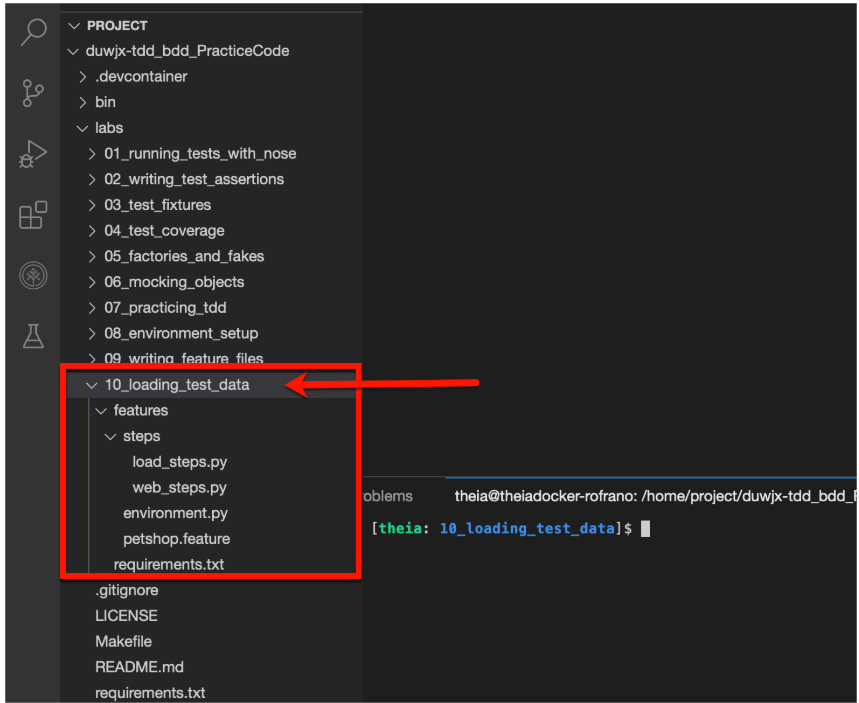

# Step 1: Create a Step

First create a step to add the code to load the data. As you learned in the video, all the steps should be placed in a folder named `steps` under the `features` folder.

While Behave does not care what you name the step files, it is recommended that you use names that let you know what each file contains. The folder already contains a file named `web_steps.py` which handles all web interactions. Since you are going to load data in this step, name the file `load_step.py`.

Open the `features/steps/load_steps.py` file in the IDE editor. 

You will work in this file for the remainder of the lab.

It already contains some initial setup code. You need to add the `step_impl()` implementation. The `petshop.feature` file bas the following `Background:` statement:
```
Background:
    Given the following pets
```

## Your Task

Use the correct Python decorator from (`@given()`, `@when()`, `@then()`) to add a step that matches the statement **“Given the following pets”**. 

Remember that all steps have the function name `step_impl()`. 

Don't forget to add a good docstring that describes what the step does.

```
@given(...place a string here that matches...)
def step_impl(context):
    """...add a docstring that tells what this step does..."""
```

## Solution

```
@given('the following pets')
def step_impl(context):
    """Refresh all Pets in the database"""
```

# Step 2: Delete previous data

Next, you will write code to delete all existing pets in the database.

The petshop application has a REST API with an endpoint named `/pets`. If you make a call to `GET /pets` all pets will be returned with a status code of `200_OK`. If you make a call to `DELETE /pets/{id}` the pet with that `id` will be deleted with a status code of `204_NO_CONTENT`. Use the REST API to write code to delete all existing pets.

## REST API Information

The `BASE_URL` of the REST API endpoint is stored in a `context` variable called: `context.base_url`. This is the hostname of the server to send requests to.

You can get all pets in the database and store them in a variable called `response` with the following REST API call:
```
response = requests.get(f"{context.base_url}/pets")
```

You can check the status code of the `response` with:
```
response.status_code
```

You can get the `json` that comes back from the `response` with:
```
response.json()
```

You can delete a pet by getting the `pet['id']` from the `json` and using the `request.delete()` call as follows:
```
requests.delete(f"{context.base_url}/pets/{pet['id']}")
```
With this information, you can now write the code to delete all pets in the databse.

## Your Task

Write a comment that describes that we are about to delete all pets

```
# List all pets and delete them one by one
```

Use the `requests` package to make a `get()` request to the `/pets` endpoint and store the results in a variable called `response`

```
response = requests.get(f"{context.base_url}/pets")
```

`Assert` that the `status_code` of the `response` is `200`

```
assert response.status_code == 200
```

Create a `for` loop to iterate over `response.json()` to process each dictionary as the variable `pet`

```
for pet in response.json():
```

Inside the loop, make a `requests.delete()` call to the `/pets` endpoint passing in the URL to delete the pet by it's `id`.

```
# Hint: The call format is: DELETE hostname/pets/{id}
response = requests.delete(f"{context.base_url}/pets/{pet['id']}")
```

Still inside the loop, `assert` that the `status_code` from the delete is `204`.

```
assert response.status_code == 204
```

## Solution

```
    # List all of the pets and delete them one by one
    response = requests.get(f"{context.base_url}/pets")
    assert response.status_code == 200
    for pet in response.json():
        response = requests.delete(f"{context.base_url}/pets/{pet['id']}")
        assert response.status_code == 204
```

# Step 3: Load new data

Now it is time to load the new data from the table in the `Background:` statement into the database. Remember from the video that the data from the `Background:` section will be returned in a variable named `context.table`. You can iterate over this table to get each row as a Python dictionary.

## REST API Information

The `BASE_URL` of the REST API endpoint is stored in a context variable called: `context.base_url`, This is the hostname of the server to send requests to.

The REST API only accepts `json` data which is similar to a Python dictionary.

You can create a pets dictionary in the database using a `POST` request and sending a `dict` using the `json= parameter of the request`. You can also store the result of the request in a variable called `response` to check the status code using the following REST API call:

```
response = requests.post(f"{context.base_url}/pets", json=payload)
```

## Your Task

Write code that implements the following steps to process each row of data in this `Background:` statement:

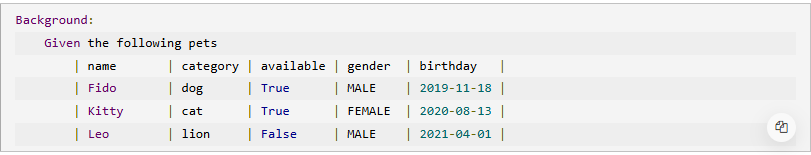

Write a comment that describes that we are about to create all of the new pets

```
# load the database with new pets
```

Use a `for` loop to iterate the `context.table` structure to process each dictionary as the variable `row`.

```
for row in context.table:
```

Create a dictionary named `payload` that pulls out the keys `name`, `category`, `available`, `gender`, and `birthday` from each `row` of the table. Make sure to convert the `available` attributes into a boolean using the words `True`, `true`, and `1` as tests.

```
payload = {
    "name": row['name'],
    "category": row['category'],
    "available": row['available'] in ['True', 'true', '1'],
    "gender": row['gender'],
    "birthday": row['birthday']
}
```

Inside the loop, make a `requests.post()` call to the `/pets` endpoint passing in the URL and the dictionary named `payload` as `json` data.

```
# Hint: The call format is: DELETE hostname/pets/{id}
response = requests.post(f"{context.base_url}/pets", json=payload)
```

Still inside the loop, `assert` that the `status_code` from the post is `201`

```
assert response.status_code == 201
```


## Solution

```
    # load the database with new pets
    for row in context.table:
        payload = {
            "name": row['name'],
            "category": row['category'],
            "available": row['available'] in ['True', 'true', '1'],
            "gender": row['gender'],
            "birthday": row['birthday']
        }
        response = requests.post(f"{context.base_url}/pets", json=payload)
        assert response.status_code == 201
```

# Step 4: Check your work

The final step function should look like this. If it does not, please correct it before proceeding:

```
# pylint: disable=function-redefined, missing-function-docstring
# flake8: noqa
"""
Pet Steps
Steps file for Pet.feature
For information on Waiting until elements are present in the HTML see:
    https://selenium-python.readthedocs.io/waits.html
"""
import requests
from behave import given

# Load data here

@given('the following pets')
def step_impl(context):
    """Refresh all Pets in the database"""

    # List all pets and delete them one by one
    response = requests.get(f"{context.base_url}/pets")
    assert response.status_code == 200
    for pet in response.json():
        response = requests.delete(f"{context.base_url}/pets/{pet['id']}")
        assert response.status_code == 204

    # load the database with new pets
    for row in context.table:
        payload = {
            "name": row['name'],
            "category": row['category'],
            "available": row['available'] in ['True', 'true', '1'],
            "gender": row['gender'],
            "birthday": row['birthday']
        }
        response = requests.post(f"{context.base_url}/pets", json=payload)
        assert response.status_code == 201
```

# Step 5: Run behave

Now it is time to run the `behave` command and see if everything is working properly.

## Your Task

Run `behave` from the lab folder in the terminal.

The output should look like this:

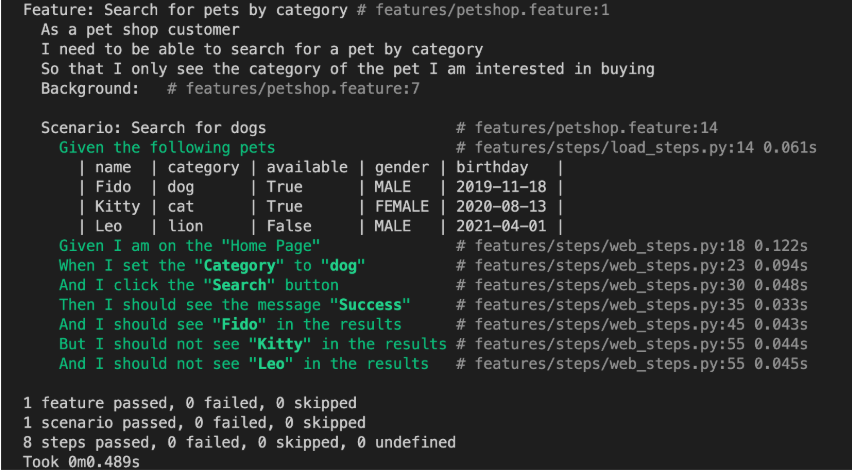

# Conclusion

Congratulations! You just completed the **Loading Test Data with Behave lab**. You should now have the skills to take any test data that is specoified in the `Background:` section of a feature file and load it into the service under test using a REST API.

Your next challenge is to apply these techniques in your projects to load test data as the initial state of your Behavior Driven Development tests.